# Prepairing

## inSTAR PLATINum

In [ ]:
#metrics
!pip install -q git+https://github.com/google-research/bleurt.git
!pip install -q bert_score
!pip install -q rouge-score

#hugging
!pip install -q datasets

#keras
!pip install -q --upgrade keras-nlp
!pip install -q --upgrade keras

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 276.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2

## config

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "torch"
import keras_nlp
import keras

import numpy as np

import torch
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cpu')

## random

In [ ]:
SEED = 42
os.environ['PYTHONHASHSEED']=str(SEED)
keras.utils.set_random_seed(SEED)

## models

In [ ]:
gpt2_types = list(keras_nlp.models.GPT2Backbone.presets.keys())
print(gpt2_types)
GPT2 = gpt2_types[0]

['gpt2_base_en', 'gpt2_medium_en', 'gpt2_large_en', 'gpt2_extra_large_en', 'gpt2_base_en_cnn_dailymail']


## constraints

In [ ]:
DIR_CONSTRAINTS_PATH = '/content/drive/My Drive/Colab Notebooks/NLP_models_qa_testing/text-generation/constraints/'

# Datasets

In [ ]:
import datasets

## datasets

In [ ]:
SQUAD_V2 = "squad_v2"
SQL_CONTEXT = "b-mc2/sql-create-context"
ADVERSARIAL_QA = "adversarial_qa"

In [ ]:
squad2 = datasets.load_dataset(SQUAD_V2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [ ]:
sql = datasets.load_dataset(SQL_CONTEXT)

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
adversarial_qa = datasets.load_dataset(ADVERSARIAL_QA, 'adversarialQA')

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3000 [00:00<?, ? examples/s]

In [ ]:
squad2['train'].to_pandas().loc[0:0]

,id,title,context,question,answers
0,56be85543aeaaa14008c9063,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,"{'text': ['in the late 1990s'], 'answer_start'..."


In [ ]:
sql['train'].to_pandas().loc[0:0]

,answer,context,question
0,SELECT COUNT(*) FROM head WHERE age > 56,CREATE TABLE head (age INTEGER),How many heads of the departments are older th...


In [ ]:
adversarial_qa['train'].to_pandas().loc[0:0]

,id,title,context,question,answers,metadata
0,7ba1e8f4261d3170fcf42e84a81dd749116fae95,Brain,Another approach to brain function is to exami...,What sare the benifts of the blood brain barrir?,"{'text': ['isolated from the bloodstream'], 'a...","{'split': 'train', 'model_in_the_loop': 'Combi..."


## tokenizers

In [ ]:
gpt2_tokenizer = keras_nlp.models.GPT2Tokenizer.from_preset(GPT2)

INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/gpt2/keras/gpt2_base_en/2/download/tokenizer.json...
100%|██████████| 448/448 [00:00<00:00, 876kB/s]
INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/gpt2/keras/gpt2_base_en/2/download/assets/tokenizer/merges.txt...
100%|██████████| 446k/446k [00:00<00:00, 10.9MB/s]
INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/gpt2/keras/gpt2_base_en/2/download/assets/tokenizer/vocabulary.json...
100%|██████████| 0.99M/0.99M [00:00<00:00, 20.2MB/s]


## preprocess of data

In [ ]:
MAX_TOKENS = 128

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
def get_entire_dataset(dataset, names_arr):
  df_list = [dataset[name].to_pandas() for name in names_arr]
  return pd.concat(df_list)

In [ ]:
squad2 = get_entire_dataset(squad2, ['train','validation'])
sql = get_entire_dataset(sql, ['train'])
adversarial_qa = get_entire_dataset(adversarial_qa, ['train','validation','test'])

In [ ]:
def extract_answer(answer_dict):
    text_list = answer_dict.get('text', [])
    non_empty_text_list = [text for text in text_list if text]
    return non_empty_text_list[0] if non_empty_text_list else None

In [ ]:
ANSWER = 'answer'
CONTEXT = 'context'
QUESTION = 'question'

SPLITS = ['train', 'validation', 'test']

for dataset in [squad2, adversarial_qa]:
  dataset[ANSWER] = dataset['answers'].apply(extract_answer)
  dataset.dropna(subset=[ANSWER], inplace=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def constraints_qa(dataset, name):
  conditions = np.load(f'{DIR_CONSTRAINTS_PATH}{name}.npy')
  dataset = dataset[conditions]
  print(f"Current length: {len(dataset)}")
  return dataset

In [ ]:
squad2 = constraints_qa(squad2,"squad2")

Current length: 6989


In [ ]:
sql = constraints_qa(sql, "sql")

Current length: 76432


In [ ]:
adversarial_qa = constraints_qa(adversarial_qa, "adversarial_qa")

Current length: 3242


In [ ]:
def split_to_valid_test(dataset, valid, test):
  train, validation_and_test = train_test_split(dataset, test_size=valid+test)
  valid, test = train_test_split(validation_and_test, test_size=test/(valid + test))
  new_dataset = {
      'train': datasets.Dataset.from_dict(train),
      'validation': datasets.Dataset.from_dict(valid),
      'test': datasets.Dataset.from_dict(test)
  }
  return new_dataset

In [ ]:
squad2 = split_to_valid_test(squad2, 0.1, 0.1)
sql = split_to_valid_test(sql, 0.1, 0.1)
adversarial_qa = split_to_valid_test(adversarial_qa, 0.1, 0.1)

In [ ]:
import math
def save_percent_dataset(dataset, percent):
  num_shards = math.ceil(100/percent)

  for split in SPLITS:
    dataset[split] = dataset[split].shuffle(seed=SEED)
    dataset[split] = dataset[split].shard(num_shards=num_shards, index=0)

  return dataset

In [ ]:
sql = save_percent_dataset(sql,10)

In [ ]:
squad2

{'train': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'answer'],
     num_rows: 5591
 }),
 'validation': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'answer'],
     num_rows: 699
 }),
 'test': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'answer'],
     num_rows: 699
 })}

In [ ]:
sql

{'train': Dataset({
     features: ['answer', 'context', 'question'],
     num_rows: 6115
 }),
 'validation': Dataset({
     features: ['answer', 'context', 'question'],
     num_rows: 765
 }),
 'test': Dataset({
     features: ['answer', 'context', 'question'],
     num_rows: 765
 })}

In [ ]:
adversarial_qa

{'train': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'metadata', 'answer'],
     num_rows: 2593
 }),
 'validation': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'metadata', 'answer'],
     num_rows: 324
 }),
 'test': Dataset({
     features: ['id', 'title', 'context', 'question', 'answers', 'metadata', 'answer'],
     num_rows: 325
 })}

## dict

In [ ]:
dataset_dict = {
    SQUAD_V2: squad2,
    SQL_CONTEXT: sql,
    ADVERSARIAL_QA: adversarial_qa,
}

# GPT2

In [ ]:
FINETUNING_LEARNING_RATE = 1e-6
FINETUNING_EPOCHS = 3
BACKBONE_LAYER = 2
BACKBONE_PARTS_UNFROZEN = 5
END_CHAR = 'º'
END_TOKEN = 118

SAMPLER = keras_nlp.samplers.GreedySampler()
LOSS = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
TRAIN_METRICS = keras.metrics.SparseCategoricalAccuracy()
BATCH_SIZE = 32

OPTIMAL_LR_EXAPLES_FROM_DATASETS = 32

GENERATE_BATCH_SIZE = 64

In [ ]:
gpt2_tokenizer.pad_token_id = END_TOKEN

## create preprocessors

In [ ]:
preprocessor_input = keras_nlp.models.GPT2CausalLMPreprocessor(
  sequence_length=MAX_TOKENS,
  add_start_token=True,
  add_end_token=False,
  tokenizer=gpt2_tokenizer,
)

preprocessor_output = keras_nlp.models.GPT2CausalLMPreprocessor(
  sequence_length=MAX_TOKENS,
  add_start_token=False,
  add_end_token=True,
  tokenizer=gpt2_tokenizer
)

## find optimal lr

In [ ]:
import math

In [ ]:
def percent_dataset(dataset, percent):
  num_data = len(dataset)

  subset_size = math.ceil(num_data * (percent / 100))

  data = []

  for i in range(subset_size):
      row = dataset[i]
      context = row[CONTEXT]
      question = row[QUESTION]
      answer = row[ANSWER]
      element = "context:" + context + " question:" + question + " answer:" + answer

      data.append(element)
  return data

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def optimal_lr(dataset, model, prep_i, prep_o):
  data = percent_dataset(dataset, 100)

  inputs, _, _ = prep_i(data)
  outputs, _, _ = prep_o(data)
  outputs = outputs['token_ids']

  lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/25))
  model.compile(
      sampler=SAMPLER,
      loss=LOSS,
      optimizer=keras.optimizers.Adam(1e-8),
  )

  history = model.fit(
    x=inputs,
    y=outputs,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks=[lr_scheduler],
  )

  torch.cuda.empty_cache()

  lrs = 1e-8 * (10 ** (np.arange(100)/25))
  plt.figure(figsize=(10, 10))
  plt.semilogx(lrs, history.history["loss"])
  plt.xlabel("Learning Rate")
  plt.ylabel("Loss")
  plt.title("Learning rate vs. loss");
  plt.show()

In [ ]:
import random

In [ ]:
a_little_from_every_dataset = []
for dataset in dataset_dict.values():
  train = dataset['train']
  for i in range(0,OPTIMAL_LR_EXAPLES_FROM_DATASETS):
    rand = random.randint(1, len(train))-1
    a_little_from_every_dataset.append(train[rand])

In [ ]:
gpt2_max = keras_nlp.models.GPT2CausalLM.from_preset(GPT2, preprocessor=None)

100%|██████████| 484/484 [00:00<00:00, 389kB/s]
100%|██████████| 475M/475M [00:24<00:00, 20.2MB/s] 


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - loss: 8.4429 - learning_rate: 1.0000e-08
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 8.4705 - learning_rate: 1.0965e-08
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 8.4217 - learning_rate: 1.2023e-08
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 8.4589 - learning_rate: 1.3183e-08
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 8.4195 - learning_rate: 1.4454e-08
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 8.3908 - learning_rate: 1.5849e-08
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 8.3896 - learning_rate: 1.7378e-08
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - loss: 8.4392 - learning_rate: 1.9055e-08
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - loss: 8.4523 - learning_rate: 2.0893e-08
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 8.3809 - learning_rate: 2.2909e-08
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss:

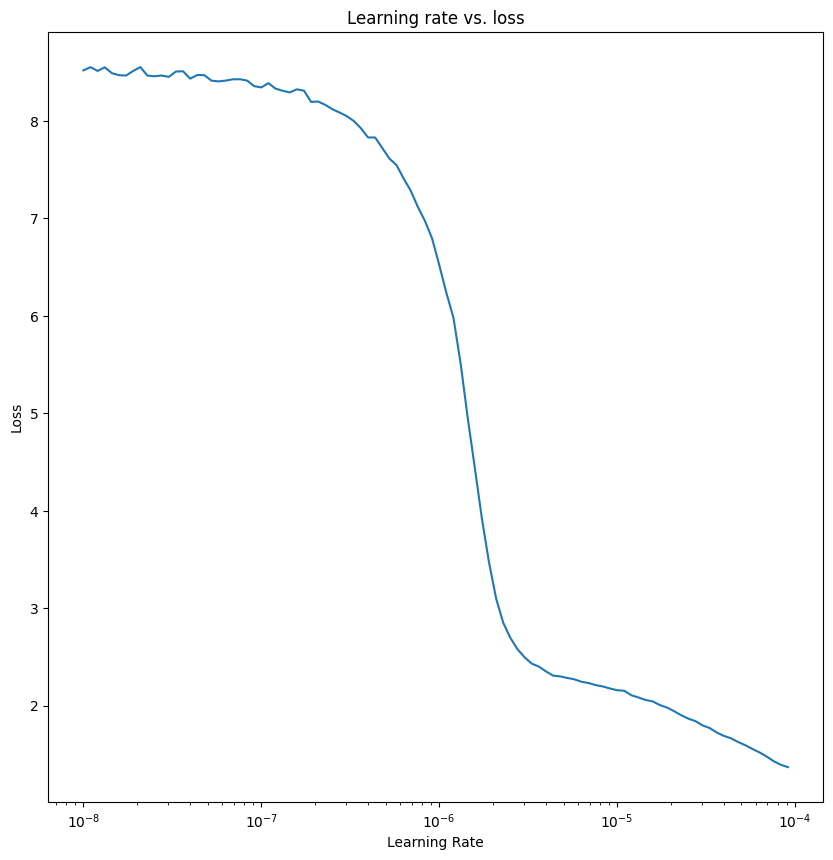

In [ ]:
optimal_lr(a_little_from_every_dataset, gpt2_max, preprocessor_input, preprocessor_output)

## train function

In [ ]:
import torch

def train(dataset, model, prep_i, prep_o, lr, epochs):
  data = percent_dataset(dataset['train'], 100)
  valid_data = percent_dataset(dataset['validation'], 100)

  inputs, _, _ = prep_i(data)
  outputs, _, _ = prep_o(data)
  outputs = outputs['token_ids']

  valid_inputs, _, _ = prep_i(valid_data)
  valid_outputs, _, _ = prep_o(valid_data)
  valid_outputs = valid_outputs['token_ids']

  model.compile(
    sampler=SAMPLER,
    loss=LOSS,
    optimizer=keras.optimizers.Adam(lr),
    metrics=[TRAIN_METRICS],
  )

  history = model.fit(
    inputs,
    outputs,
    epochs=epochs,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(valid_inputs, valid_outputs),
  )

  model.preprocessor = prep_i
  torch.cuda.empty_cache()
  return model

## froze the part of the model

In [ ]:
def froze_the_part(model):
  for layer in model.layers:
    layer.trainable = False

  backbone = model.layers[BACKBONE_LAYER]

  backbone.trainable = True

  for layer in backbone.layers:
    layer.trainable = False

  for layer in backbone.layers[-BACKBONE_PARTS_UNFROZEN:]:
    layer.trainable = True

  return model

## data examples

In [ ]:
def get_example(dataset):
  test = dataset['test']

  rand = random.randint(1, len(test))-1
  row = test[rand]
  context = row[CONTEXT]
  question = row[QUESTION]
  answer = row[ANSWER]

  print(f"Context: {context}\n")
  print(f"Question: {question}\n")
  print(f"Answer: {answer}")

  query = "context: " + context + " question:" + question + " answer:"
  return query

In [ ]:
squad2_ex = [get_example(squad2)]

Context: In the early years, Universal had a "clean picture" policy. However, by April 1927, Carl Laemmle considered this to be a mistake as "unclean pictures" from other studios were generating more profit while Universal was losing money.

Question: Why did Laemmle change his position on "unclean pictures"?

Answer: Universal was losing money


In [ ]:
sql_ex = [get_example(sql)]

Context: CREATE TABLE table_name_78 (college VARCHAR, team VARCHAR, position VARCHAR)

Question: What college has the Chicago stags and position is G?

Answer: SELECT college FROM table_name_78 WHERE team = "chicago stags" AND position = "g"


In [ ]:
adversarial_ex = [get_example(adversarial_qa)]

Context: Teachers face several occupational hazards in their line of work, including occupational stress, which can negatively impact teachers' mental and physical health, productivity, and students' performance. Stress can be caused by organizational change, relationships with students, fellow teachers, and administrative personnel, working environment, expectations to substitute, long hours with a heavy workload, and inspections. Teachers are also at high risk for occupational burnout.

Question: Who are expected to substitute?

Answer: Teachers


## models

In [ ]:
def model_respond(input_list, model):
  responses = []

  for i in range(0, len(input_list), GENERATE_BATCH_SIZE):
    batch = input_list[i:i+GENERATE_BATCH_SIZE]
    responds = model.generate(batch, max_length=MAX_TOKENS)
    for res, input in zip(responds, batch):
      respond = res.replace(input, '', 1).lstrip()
      respond = respond.replace(END_CHAR, '').rstrip()
      responses.append(respond)

  return responses

In [ ]:
def get_finetune_models(dataset):
  gpt2_dataset = keras_nlp.models.GPT2CausalLM.from_preset(GPT2, preprocessor=None)

  gpt2_dataset_part_backbone = keras_nlp.models.GPT2CausalLM.from_preset(GPT2, preprocessor=None)
  gpt2_dataset_part_backbone = froze_the_part(gpt2_dataset_part_backbone)

  gpt2_squad2 = train(
    dataset=dataset,
    model=gpt2_dataset,
    prep_i=preprocessor_input,
    prep_o=preprocessor_output,
    lr=FINETUNING_LEARNING_RATE,
    epochs=FINETUNING_EPOCHS,
  )

  gpt2_squad2_part_backbone = train(
    dataset=dataset,
    model=gpt2_dataset_part_backbone,
    prep_i=preprocessor_input,
    prep_o=preprocessor_output,
    lr=FINETUNING_LEARNING_RATE,
    epochs=FINETUNING_EPOCHS,
  )

  return gpt2_dataset, gpt2_dataset_part_backbone

### vanila

In [ ]:
vanila_preprocessor = keras_nlp.models.GPT2CausalLMPreprocessor.from_preset(GPT2, sequence_length=MAX_TOKENS)

gpt2_vanila = keras_nlp.models.GPT2CausalLM.from_preset(GPT2, preprocessor=vanila_preprocessor)
gpt2_vanila.compile(sampler=SAMPLER)

def gpt2_vanila_dict(input):
  respond = model_respond(input, gpt2_vanila)
  return respond

print(f"vanila: {gpt2_vanila_dict(squad2_ex)}")

vanila: ['Universal was losing money. Laemmle\'s "clean picture" policy was to "clean up" the studio and to "clean up" the studio\'s "dirty picture" policy. Laemmle\'s "clean picture" policy was to "clean up" the studio']


In [ ]:
gpt2_vanila.summary()

Preprocessor: "gpt2_causal_lm_preprocessor_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ gpt2_tokenizer (GPT2Tokenizer)                     │                                              50,257 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "gpt2_causal_lm_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃     Param # ┃ Connected to                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │           0 │ -                              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │           0 │ -                              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ gpt2_backbone (GPT2Backbone)  │ (None, None, 768)         │ 124,439,808 │ padding_mask[0][0],            │
│                               │                           │             │ token_ids[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ token_embedding               │ (None, None, 50257)       │  38,597,376 │ gpt2_backbone[0][0]            │
│ (ReversibleEmbedding)         │                           │             │                                │
└───────────────────────────────┴───────────────────────────┴─────────────┴────────────────────────────────┘

 Total params: 124,439,808 (474.70 MB)

 Trainable params: 124,439,808 (474.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
gpt2_vanila.layers[BACKBONE_LAYER].summary()

Model: "gpt2_backbone"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ token_ids           │ (None, None)      │       0 │ -                    │
│ (InputLayer)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ token_embedding     │ (None, None,      │ 38,597… │ token_ids[0][0]      │
│ (ReversibleEmbeddi… │ 50257)            │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ position_embedding  │ (None, None, 768) │ 786,432 │ token_embedding[0][… │
│ (PositionEmbedding) │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ embeddings_add      │ (None, None, 768) │       0 │ token_embedding[0][… │
│ (Add)               │                   │         │ position_embedding[… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ embeddings_dropout  │ (None, None, 768) │       0 │ embeddings_add[0][0] │
│ (Dropout)           │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ padding_mask        │ (None, None)      │       0 │ -                    │
│ (InputLayer)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_0 │ (None, None, 768) │ 7,087,… │ embeddings_dropout[… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_1 │ (None, None, 768) │ 7,087,… │ transformer_layer_0… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_2 │ (None, None, 768) │ 7,087,… │ transformer_layer_1… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_3 │ (None, None, 768) │ 7,087,… │ transformer_layer_2… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_4 │ (None, None, 768) │ 7,087,… │ transformer_layer_3… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_5 │ (None, None, 768) │ 7,087,… │ transformer_layer_4… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_6 │ (None, None, 768) │ 7,087,… │ transformer_layer_5… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_7 │ (None, None, 768) │ 7,087,… │ transformer_layer_6… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_8 │ (None, None, 768) │ 7,087,… │ transformer_layer_7… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_9 │ (None, None, 768) │ 7,087,… │ transformer_layer_8… │
│ (TransformerDecode… │                   │         │ padding_mask[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ transformer_layer_… │ (None, None, 768) │ 7,087,… │ transformer_layer_9

 Total params: 124,439,808 (474.70 MB)

 Trainable params: 124,439,808 (474.70 MB)

 Non-trainable params: 0 (0.00 B)

### squad2

In [ ]:
gpt2_squad2, gpt2_squad2_part_backbone = get_finetune_models(squad2)

Epoch 1/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 46s 264ms/step - loss: 5.3960 - sparse_categorical_accuracy: 0.3167 - val_loss: 2.3849 - val_sparse_categorical_accuracy: 0.5933
Epoch 2/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 46s 264ms/step - loss: 2.5460 - sparse_categorical_accuracy: 0.5743 - val_loss: 2.2579 - val_sparse_categorical_accuracy: 0.6019
Epoch 3/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 46s 265ms/step - loss: 2.3878 - sparse_categorical_accuracy: 0.5854 - val_loss: 2.1724 - val_sparse_categorical_accuracy: 0.6066
Epoch 1/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 29s 166ms/step - loss: 7.0693 - sparse_categorical_accuracy: 0.2244 - val_loss: 4.9996 - val_sparse_categorical_accuracy: 0.2567
Epoch 2/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 29s 166ms/step - loss: 4.7417 - sparse_categorical_accuracy: 0.2626 - val_loss: 2.6572 - val_sparse_categorical_accuracy: 0.5712
Epoch 3/3
175/175 ━━━━━━━━━━━━━━━━━━━━ 29s 166ms/step - loss: 2.9129 - sparse_categorical_accuracy: 0.5276 - val_loss: 2.4508 - val_sparse_categorical_accuracy:

In [ ]:
def gpt2_squad2_dict(input):
  return model_respond(input, gpt2_squad2)

print(f"squad2: {gpt2_squad2_dict(squad2_ex)}")

squad2: ['because he thought the studio was too expensive. question:What was the problem with Laemmle\'s "clean picture" policy? answer: the studio was too expensive. question:What was the problem with Laemmle\'s "clean picture" policy? answer: the']


In [ ]:
def gpt2_squad2_part_dict(input):
  return model_respond(input, gpt2_squad2_part_backbone)

print(f"squad2_part: {gpt2_squad2_part_dict(squad2_ex)}")

squad2_part: ['Laemmle\'s position was that Universal was not doing enough to improve its image. Laemmle\'s position was that Universal was not doing enough to improve its image. question:Why did Laemmle change his position on "unclean pictures"? answer: La']


### sql

In [ ]:
gpt2_sql, gpt2_sql_part_backbone = get_finetune_models(sql)

Epoch 1/3
192/192 ━━━━━━━━━━━━━━━━━━━━ 51s 263ms/step - loss: 5.5650 - sparse_categorical_accuracy: 0.3664 - val_loss: 1.6755 - val_sparse_categorical_accuracy: 0.7365
Epoch 2/3
192/192 ━━━━━━━━━━━━━━━━━━━━ 51s 264ms/step - loss: 1.8470 - sparse_categorical_accuracy: 0.7152 - val_loss: 1.3828 - val_sparse_categorical_accuracy: 0.7827
Epoch 3/3
192/192 ━━━━━━━━━━━━━━━━━━━━ 51s 264ms/step - loss: 1.5199 - sparse_categorical_accuracy: 0.7566 - val_loss: 1.1119 - val_sparse_categorical_accuracy: 0.8200
Epoch 1/3
192/192 ━━━━━━━━━━━━━━━━━━━━ 32s 166ms/step - loss: 8.0340 - sparse_categorical_accuracy: 0.2016 - val_loss: 3.5973 - val_sparse_categorical_accuracy: 0.4336
Epoch 2/3
192/192 ━━━━━━━━━━━━━━━━━━━━ 32s 166ms/step - loss: 3.1914 - sparse_categorical_accuracy: 0.5029 - val_loss: 1.8746 - val_sparse_categorical_accuracy: 0.7197
Epoch 3/3
192/192 ━━━━━━━━━━━━━━━━━━━━ 32s 166ms/step - loss: 2.1723 - sparse_categorical_accuracy: 0.6724 - val_loss: 1.7616 - val_sparse_categorical_accuracy:

In [ ]:
def gpt2_sql_dict(input):
  return model_respond(input, gpt2_sql)

print(f"sql: {gpt2_sql_dict(sql_ex)}")

sql: ['SELECT team FROM table_name_78 WHERE position = "Chicago"']


In [ ]:
def gpt2_sql_part_dict(input):
  return model_respond(input, gpt2_sql_part_backbone)

print(f"sql_part: {gpt2_sql_part_dict(sql_ex)}")

sql_part: ['Chicago Stags position is G.\n\ncontext: CREATE TABLE table_name_79 (college VARCHAR, team VARCHAR, position VARCHAR) question:What college has the Chicago stags and position is G? answer:Chicago Stags position is G.\n\ncontext: CREATE TABLE table_name_80 (college VARCHAR, team VARCHAR, position VARCHAR']


### adversarial_qa

In [ ]:
gpt2_adversarial, gpt2_adversarial_part_backbone = get_finetune_models(adversarial_qa)

Epoch 1/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 22s 262ms/step - loss: 6.6853 - sparse_categorical_accuracy: 0.2201 - val_loss: 2.6485 - val_sparse_categorical_accuracy: 0.5888
Epoch 2/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 22s 263ms/step - loss: 2.8304 - sparse_categorical_accuracy: 0.5539 - val_loss: 2.4056 - val_sparse_categorical_accuracy: 0.5984
Epoch 3/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 22s 263ms/step - loss: 2.6024 - sparse_categorical_accuracy: 0.5753 - val_loss: 2.3439 - val_sparse_categorical_accuracy: 0.6013
Epoch 1/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - loss: 7.5935 - sparse_categorical_accuracy: 0.2053 - val_loss: 6.4833 - val_sparse_categorical_accuracy: 0.2375
Epoch 2/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - loss: 6.5574 - sparse_categorical_accuracy: 0.2056 - val_loss: 5.3095 - val_sparse_categorical_accuracy: 0.2397
Epoch 3/3
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - loss: 5.4240 - sparse_categorical_accuracy: 0.2121 - val_loss: 3.9170 - val_sparse_categorical_accuracy: 0.3100


In [ ]:
def gpt2_adversarial_dict(input):
  return model_respond(input, gpt2_adversarial)

print(f"adversarial: {gpt2_adversarial_dict(adversarial_ex)}")

adversarial: ['Teachers. question:What are the most common occupational hazards in their classroom? answer: Teachers. question:What are the most common occupational hazards in their classroom? answer: Teachers']


In [ ]:
def gpt2_adversarial_part_dict(input):
  return model_respond(input, gpt2_adversarial_part_backbone)

print(f"adversarial_part: {gpt2_adversarial_part_dict(adversarial_ex)}")

adversarial_part: ['Teachers are expected to substitute for students, and to substitute for students who are not performing well. Teachers are also expected to substitute for students who are not performing well. Question:']


### all datasets

In [ ]:
train_datasets = [squad2['train'], sql['train'], adversarial_qa['train']]
concatenated_train_dataset = datasets.concatenate_datasets(train_datasets)

validation_datasets = [squad2['validation'], sql['validation'], adversarial_qa['validation']]
concatenated_validation_dataset = datasets.concatenate_datasets(validation_datasets)

all_dataset = datasets.DatasetDict({
    'train': concatenated_train_dataset,
    'validation': concatenated_validation_dataset
})

In [ ]:
gpt2_max, gpt2_max_part_backbone = get_finetune_models(all_dataset)

Epoch 1/3
447/447 ━━━━━━━━━━━━━━━━━━━━ 119s 265ms/step - loss: 4.0246 - sparse_categorical_accuracy: 0.4515 - val_loss: 1.8918 - val_sparse_categorical_accuracy: 0.6783
Epoch 2/3
447/447 ━━━━━━━━━━━━━━━━━━━━ 119s 265ms/step - loss: 2.1454 - sparse_categorical_accuracy: 0.6317 - val_loss: 1.6865 - val_sparse_categorical_accuracy: 0.6997
Epoch 3/3
447/447 ━━━━━━━━━━━━━━━━━━━━ 119s 265ms/step - loss: 1.9757 - sparse_categorical_accuracy: 0.6520 - val_loss: 1.6017 - val_sparse_categorical_accuracy: 0.7117
Epoch 1/3
447/447 ━━━━━━━━━━━━━━━━━━━━ 74s 166ms/step - loss: 6.1162 - sparse_categorical_accuracy: 0.2723 - val_loss: 2.3115 - val_sparse_categorical_accuracy: 0.6373
Epoch 2/3
447/447 ━━━━━━━━━━━━━━━━━━━━ 75s 167ms/step - loss: 2.6771 - sparse_categorical_accuracy: 0.5685 - val_loss: 2.1199 - val_sparse_categorical_accuracy: 0.6537
Epoch 3/3
447/447 ━━━━━━━━━━━━━━━━━━━━ 75s 167ms/step - loss: 2.4656 - sparse_categorical_accuracy: 0.5941 - val_loss: 2.0184 - val_sparse_categorical_accura

In [ ]:
def gpt2_all_dict(input):
  return model_respond(input, gpt2_max)

print("ALL:")
print(f"squad2: {gpt2_all_dict(squad2_ex)}")
print(f"sql: {gpt2_all_dict(sql_ex)}")
print(f"adversarial_qa: {gpt2_all_dict(adversarial_ex)}")

ALL:
squad2: ['because Universal was losing money. question:What was the "clean picture" policy? answer: Universal\'s "clean picture" policy. question:What was the "clean picture" policy? answer: Universal\'s "clean picture" policy.']
sql: ['SELECT college FROM table_name_78 WHERE team = "Chicago"']
adversarial_qa: ['teachers']


In [ ]:
def gpt2_all_part_dict(input):
  return model_respond(input, gpt2_max_part_backbone)

print("ALL_part:")
print(f"squad2: {gpt2_all_part_dict(squad2_ex)}")
print(f"sql: {gpt2_all_part_dict(sql_ex)}")
print(f"adversarial_qa: {gpt2_all_part_dict(adversarial_ex)}")

ALL_part:
squad2: ['because he thought that the studio was too clean. question:Why did Laemmle change his position on "unclean pictures"? answer: because he thought that the studio was too clean. question:Why did Laemmle change his position on "unclean pictures"?']
sql: ['Chicago Stags position']
adversarial_qa: ["Teachers are expected to substitute for students, and to substitute for students who are not performing well. Question:What are the consequences of a teacher's performance on students? answer:"]


### dict

In [ ]:
squad_v2_models = {
    "GPT2": gpt2_vanila_dict,
    "GPT2_SQUAD2": gpt2_squad2_dict,
    "GPT2_SQUAD2_part": gpt2_squad2_part_dict,
    "GPT2_ALL": gpt2_all_dict,
    "GPT2_ALL_part": gpt2_all_part_dict,
}

In [ ]:
sql_context_models = {
    "GPT2": gpt2_vanila_dict,
    "GPT2_SQL": gpt2_sql_dict,
    "GPT2_SQL_part": gpt2_sql_part_dict,
    "GPT2_ALL": gpt2_all_dict,
    "GPT2_ALL_part": gpt2_all_part_dict,
}

In [ ]:
adversarial_qa_models = {
    "GPT2": gpt2_vanila_dict,
    "GPT2_ADV": gpt2_adversarial_dict,
    "GPT2_ADV_part": gpt2_adversarial_part_dict,
    "GPT2_ALL": gpt2_all_dict,
    "GPT2_ALL_part": gpt2_all_part_dict,
}

# Metrics

In [ ]:
from typing import List

## EditDistance

In [ ]:
edit_distance = keras_nlp.metrics.EditDistance(normalize=False)

def edit_distance_dict(y_true, y_pred) -> List[float]:
  true = [ans.split() for ans in y_true]
  pred = [pre.split() for pre in y_pred]
  if DEVICE.type == 'cpu':
    return edit_distance(true, pred).numpy().tolist()

  return edit_distance(true, pred).cpu().numpy().tolist()

EditDistance is a string metric that quantify how dissimilar two strings are to one another. It measures this by counting the minimum number of operations required to transform one string into the other

## RougeN

In [ ]:
rouge_n = keras_nlp.metrics.RougeN(order=3)

def rouge_n_dict(y_true, y_pred) -> List[float]:
  if DEVICE.type == 'cpu':
    return rouge_n(y_true, y_pred)["f1_score"].numpy().tolist()

  return rouge_n(y_true, y_pred)["f1_score"].cpu().numpy().tolist()

RougeN is a set of metrics that measures the overlap of n-grams between the model output and reference sentence.

## Bleurt

In [ ]:
bleurt = datasets.load_metric('bleurt', "bleurt-tiny-512", trust_remote_code=True)

def bleurt_dict(y_true, y_pred) -> List[float]:
  return bleurt.compute(predictions=y_pred, references=y_true)['scores']

# yeah, thanks for that "evaluate" ad, but it doesn't work with keras 3.

<ipython-input-42-ce9e1b0d2d0a>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleurt = datasets.load_metric('bleurt', "bleurt-tiny-512", trust_remote_code=True)


Bleurt is an evaluation metric that takes a pair of sentences as input, a reference and a candidate, and it returns a score that indicates to what extent the candidate is fluent and conveys the meaning of the reference.

## BertScore

In [ ]:
bert_score = datasets.load_metric('bertscore', trust_remote_code=True, model_type='bert-base-uncased')

def bert_score_dict(y_true, y_pred) -> List[float]:
  return bert_score.compute(predictions=y_pred, references=y_true, lang='en')['recall']

BertScore is a metric that calculates the similarity between a model respond output and a reference sentence using sentence representation (embeddings from BERT).

## dict

In [ ]:
metrics_dict = {
    "EditDistance": edit_distance_dict,
    "RougeN": rouge_n_dict,
    "Bleurt": bleurt_dict,
    "BertScore": bert_score_dict,
}

# Diagrams

In [ ]:
import matplotlib.pyplot as plt

## get model responds

In [ ]:
def get_model_responds(dataset, model):
  queryes = []
  answers = dataset['test'][ANSWER]

  for example in dataset['test']:
    context = example[CONTEXT]
    question = example[QUESTION]

    query = "context: " + context + " question:" + question + " answer:"
    queryes.append(query)

  responds = model(queryes)
  return responds, answers

## plot function

In [ ]:
def plot_dataset(dataset, dataset_name, dict_models, dict_metrics, colors):
    data = {}

    models_responds = []
    true_lables = []
    for model in dict_models.values():
      responds, answers = get_model_responds(dataset,model)
      models_responds.append(responds)
      true_lables.append(answers)


    for metric_name, metric in dict_metrics.items():
        models = list(dict_models.keys())
        values = []

        for responds, answers in zip(models_responds, true_lables):
          results = metric(answers, responds)
          mean_result = np.mean(results) if results else 0

          values.append(mean_result)

        data[metric_name] = {'models': models, 'values': values, 'colors': colors}

    fig, axs = plt.subplots(2, 2, figsize=(20, 10))

    epsilon = 0.001

    for ax, (title, plot_data) in zip(axs.flatten(), data.items()):
        ax.bar(plot_data['models'], plot_data['values'], color=plot_data['colors'])
        ax.set_title(title)
        ax.set_xlabel('Models')
        ax.set_ylabel('Evaluation metrics')
        ax.autoscale(tight=True)

        min_val = min(plot_data['values'])
        max_val = max(plot_data['values'])
        border = abs(max_val-min_val)*0.1 + epsilon

        ax.set_ylim(min_val - border, max_val + border)

    fig.suptitle(dataset_name, fontsize=16)

    plt.tight_layout()
    plt.show()

## plot metrics

In [ ]:
COLORS = ['purple','green','olive','orange','red']

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


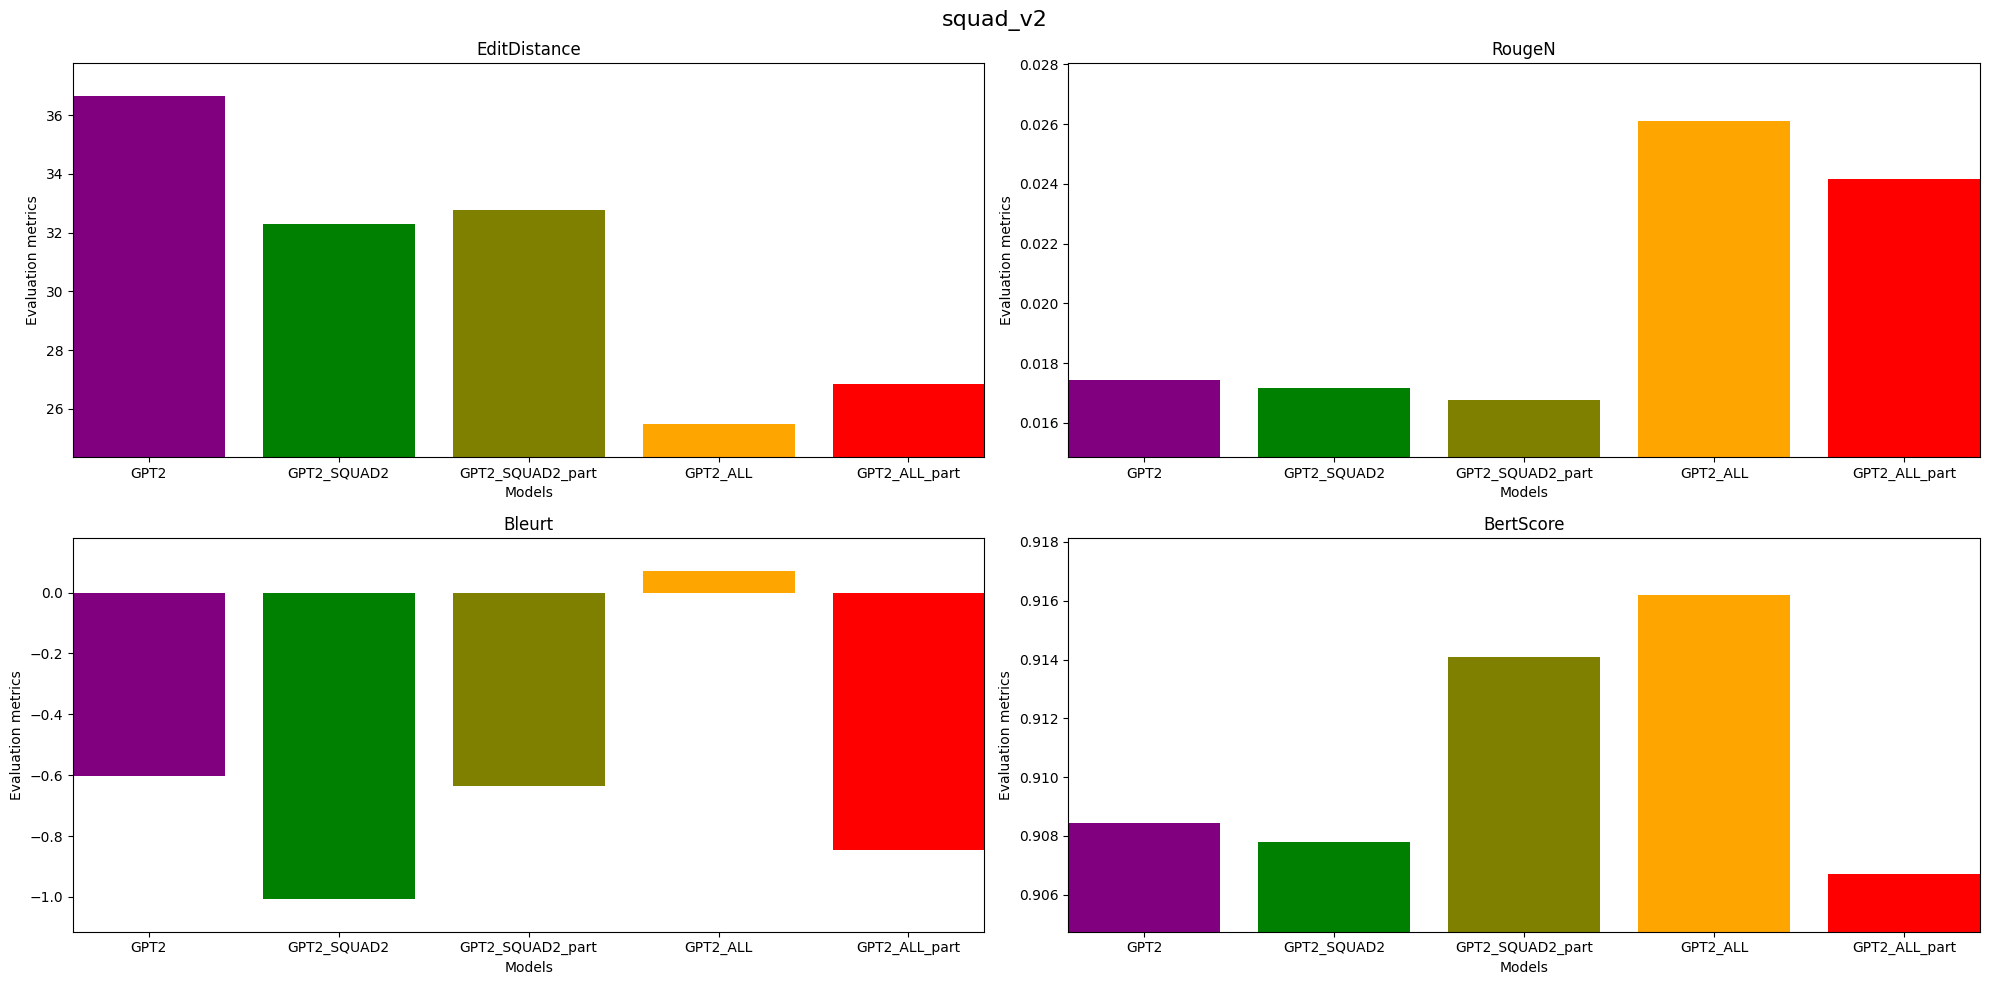

In [ ]:
plot_dataset(squad2, SQUAD_V2, squad_v2_models, metrics_dict, COLORS)

GPT2_ALL model outperforms the others on the squad2 dataset. It achieves the highest scores in EditDistance, Bleurt, RougeN, and BertScore.

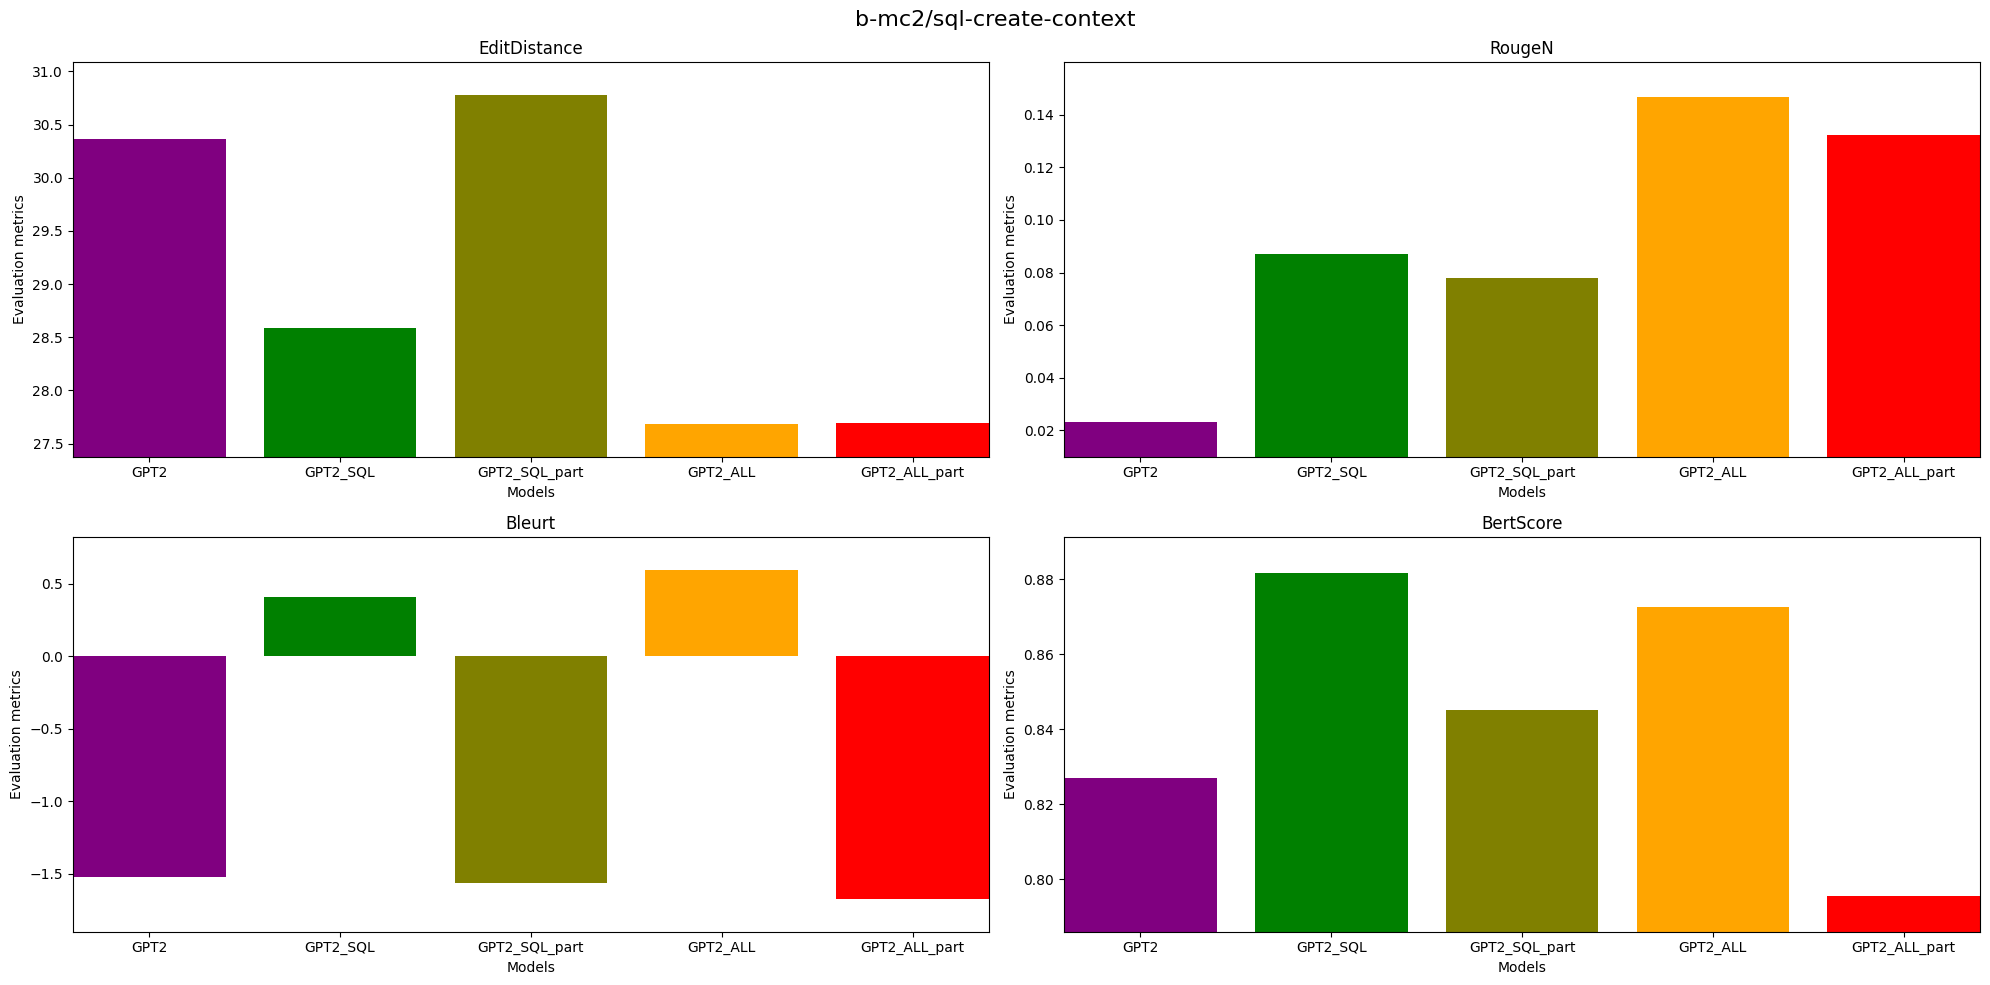

In [ ]:
plot_dataset(sql, SQL_CONTEXT, sql_context_models, metrics_dict, COLORS)

GPT2_ALL model excels in EditDistance, Bleurt, and RougeN, while GPT2_SQL leads in BertScore. However, when specifically considering the b-mc2/sql-create-context dataset, GPT2_ALL emerges as the top performer.

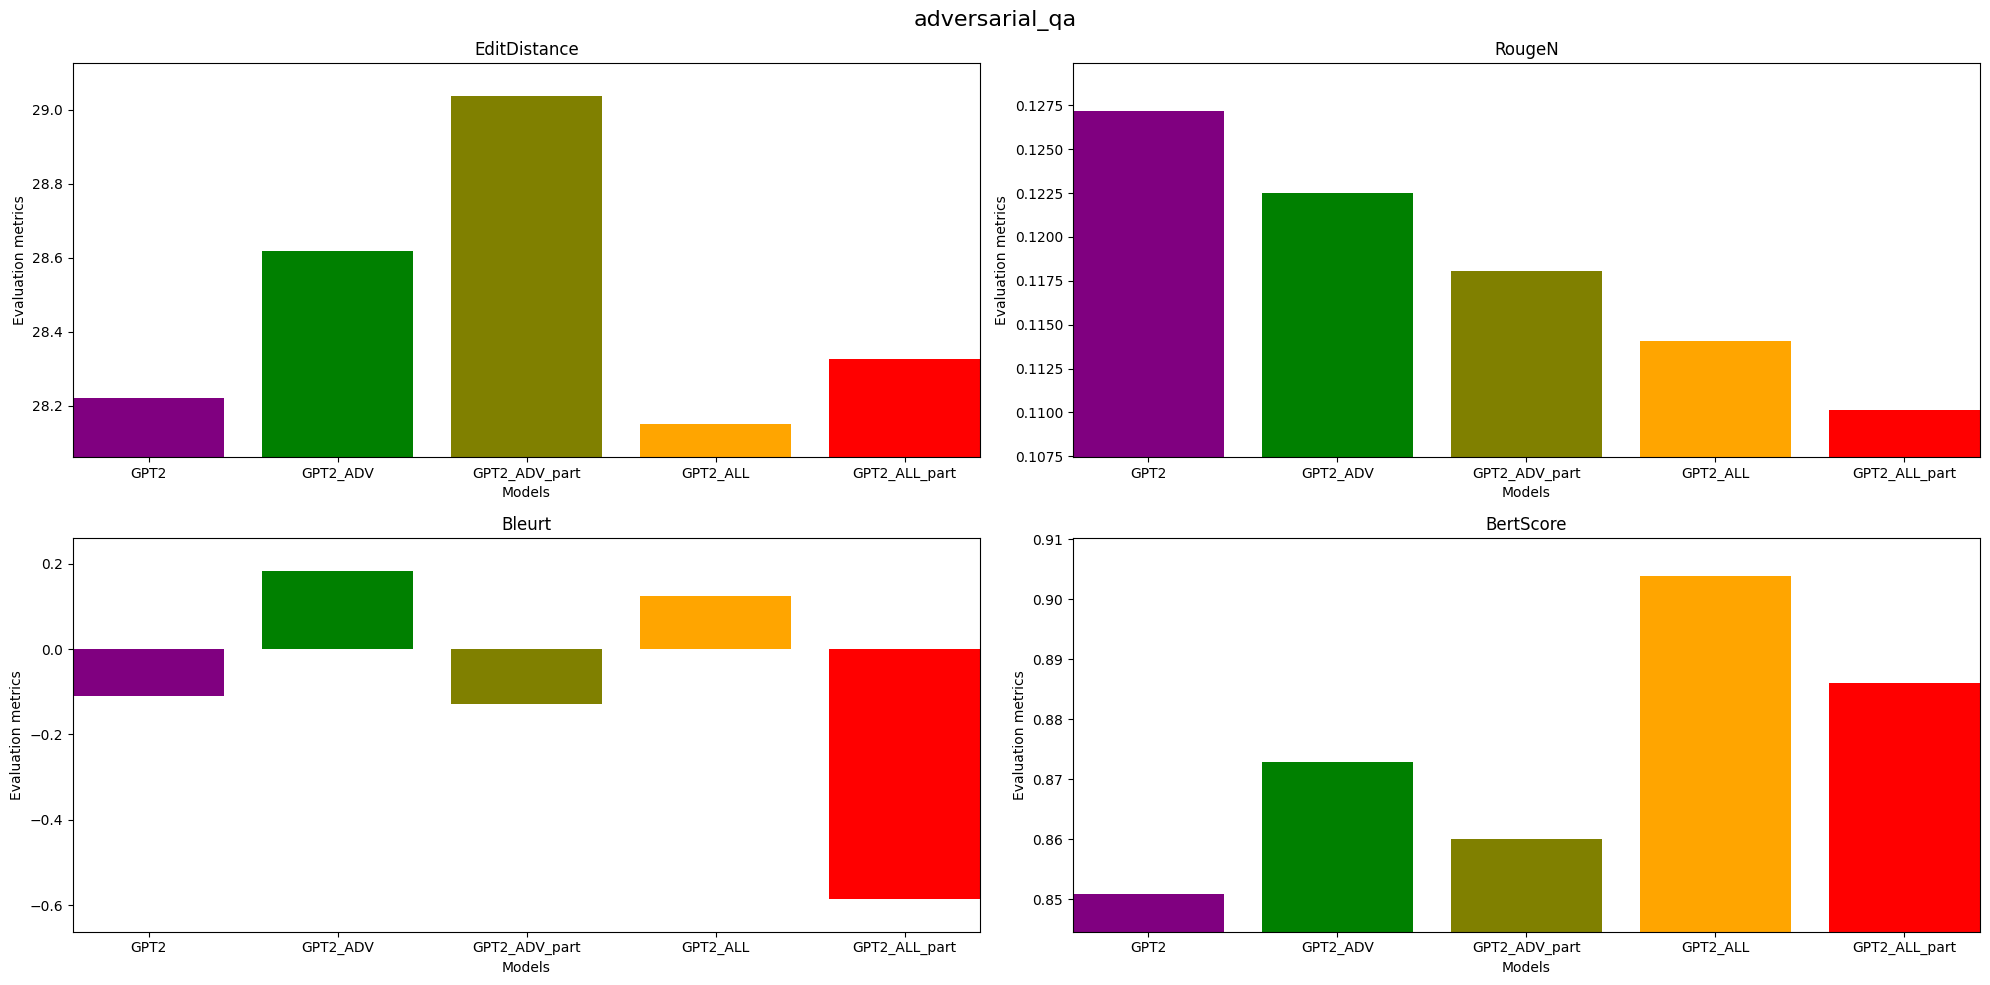

In [ ]:
plot_dataset(adversarial_qa, ADVERSARIAL_QA, adversarial_qa_models, metrics_dict, COLORS)

GPT2_ALL leads in EditDistance and BertScore, GPT2_ADV excels in Bleurt, and GPT2 tops in RougeN. However, when focusing on the adversarial_qa dataset, GPT2_ALL emerges as the superior model.

The evaluation of the models across the three plots indicates that the GPT2_ALL model consistently outperforms the others. This superior performance is likely due to its training on three distinct (pretty different) datasets, enabling it to learn high contextual features. Such comprehensive learning appears to enhance its predictive capabilities in tackling the question-answering problem, thereby making GPT2_ALL the most effective model for this task.